In [ ]:
pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS,DilatedRNN
from neuralforecast.models import NBEATS,FEDformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/Exchange/S/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/Exchange/S/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...
7583,2010-10-06,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_df

,ds,unique_id,y
0,1990-01-01,OT,-0.124081
1,1990-01-02,OT,-0.113588
2,1990-01-03,OT,-0.078960
3,1990-01-04,OT,-0.082108
4,1990-01-05,OT,-0.066368
...,...,...,...
7583,2010-10-06,OT,0.902640
7584,2010-10-07,OT,0.953585
7585,2010-10-08,OT,0.956124
7586,2010-10-09,OT,0.921979


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7492,:]
Y_test_df = Y_df.iloc[7492:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7492,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,7493,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,7494,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,7495,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,7496,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...,...
91,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=96,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 97.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-0.164592
OT,1,-0.174267
OT,2,-0.161306
OT,3,-0.167306
OT,4,-0.163474
...,...,...
OT,91,-0.154690
OT,92,-0.162441
OT,93,-0.158271


<Axes: xlabel='ds'>

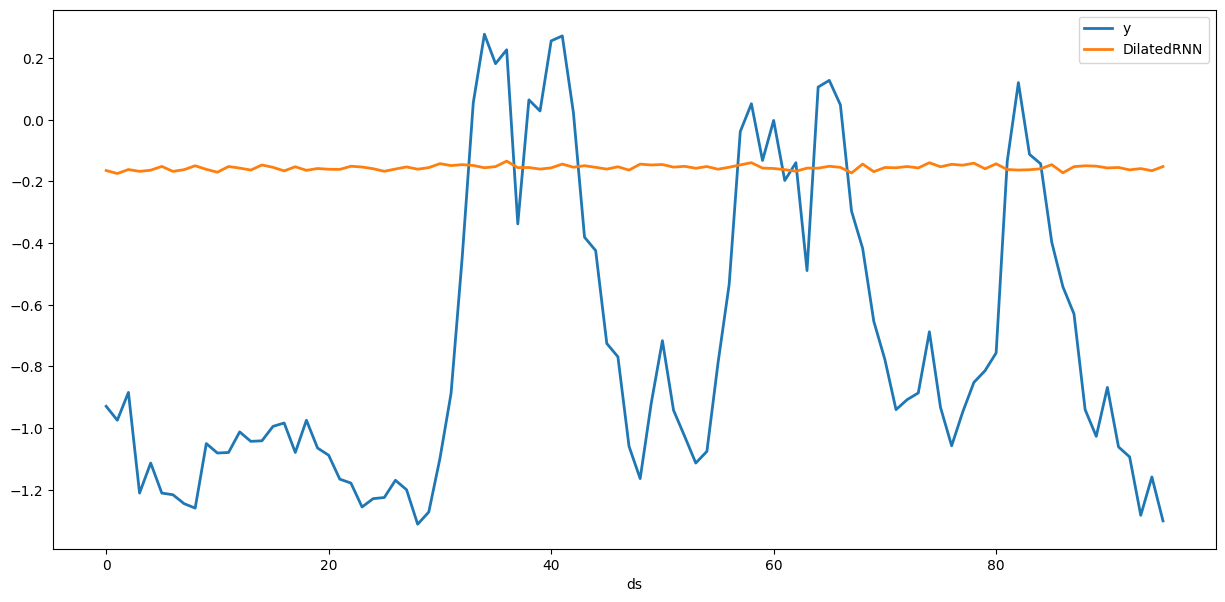

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-0.164592
1,-0.174267
2,-0.161306
3,-0.167306
4,-0.163474
...,...
91,-0.154690
92,-0.162441
93,-0.158271


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.652
DilatedRNN MSE: 0.541


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:7396,:]
Y_test_df = Y_df.iloc[7396:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7396,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,7397,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,7398,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,7399,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,7400,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...,...
187,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=192,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 97.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-0.164592
OT,1,-0.174267
OT,2,-0.161306
OT,3,-0.167306
OT,4,-0.163474
...,...,...
OT,91,-0.154690
OT,92,-0.162441
OT,93,-0.158271


<Axes: xlabel='ds'>

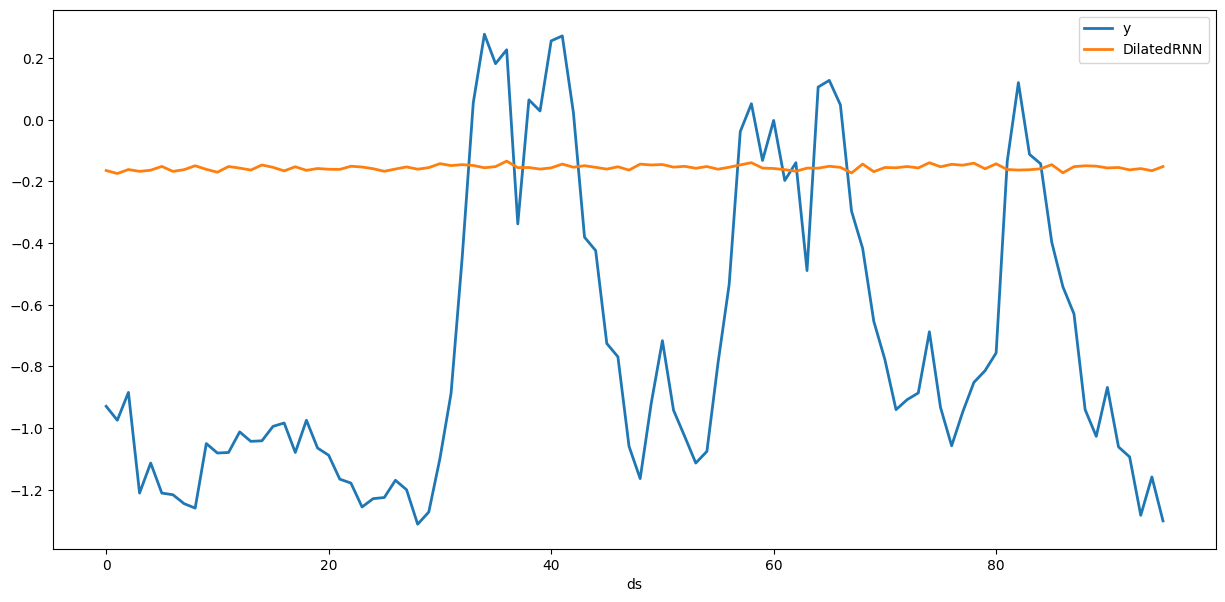

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-0.164592
1,-0.174267
2,-0.161306
3,-0.167306
4,-0.163474
...,...
91,-0.154690
92,-0.162441
93,-0.158271


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.652
DilatedRNN MSE: 0.541


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7252,:]
Y_test_df = Y_df.iloc[7252:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7252,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,7253,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,7254,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,7255,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,7256,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...,...
331,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=336,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 97.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-0.164592
OT,1,-0.174267
OT,2,-0.161306
OT,3,-0.167306
OT,4,-0.163474
...,...,...
OT,91,-0.154690
OT,92,-0.162441
OT,93,-0.158271


<Axes: xlabel='ds'>

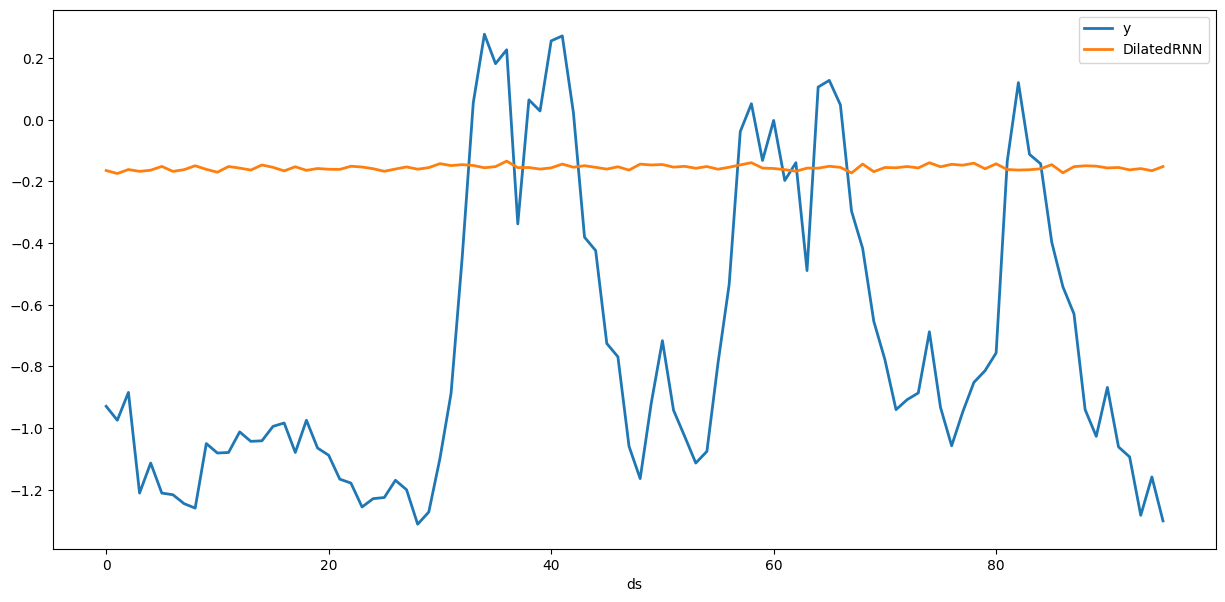

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-0.164592
1,-0.174267
2,-0.161306
3,-0.167306
4,-0.163474
...,...
91,-0.154690
92,-0.162441
93,-0.158271


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.652
DilatedRNN MSE: 0.541


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:6868,:]
Y_test_df = Y_df.iloc[6868:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,6868,2008-10-21,OT,1.807954,-0.5,-0.333333,0.166667,0.305479
1,6869,2008-10-22,OT,1.768531,-0.5,-0.166667,0.200000,0.308219
2,6870,2008-10-23,OT,1.776391,-0.5,0.000000,0.233333,0.310959
3,6871,2008-10-24,OT,1.826685,-0.5,0.166667,0.266667,0.313699
4,6872,2008-10-25,OT,1.815562,-0.5,0.333333,0.300000,0.316438
...,...,...,...,...,...,...,...,...
715,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
716,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
717,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
718,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=720,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 97.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-0.164592
OT,1,-0.174267
OT,2,-0.161306
OT,3,-0.167306
OT,4,-0.163474
...,...,...
OT,91,-0.154690
OT,92,-0.162441
OT,93,-0.158271


<Axes: xlabel='ds'>

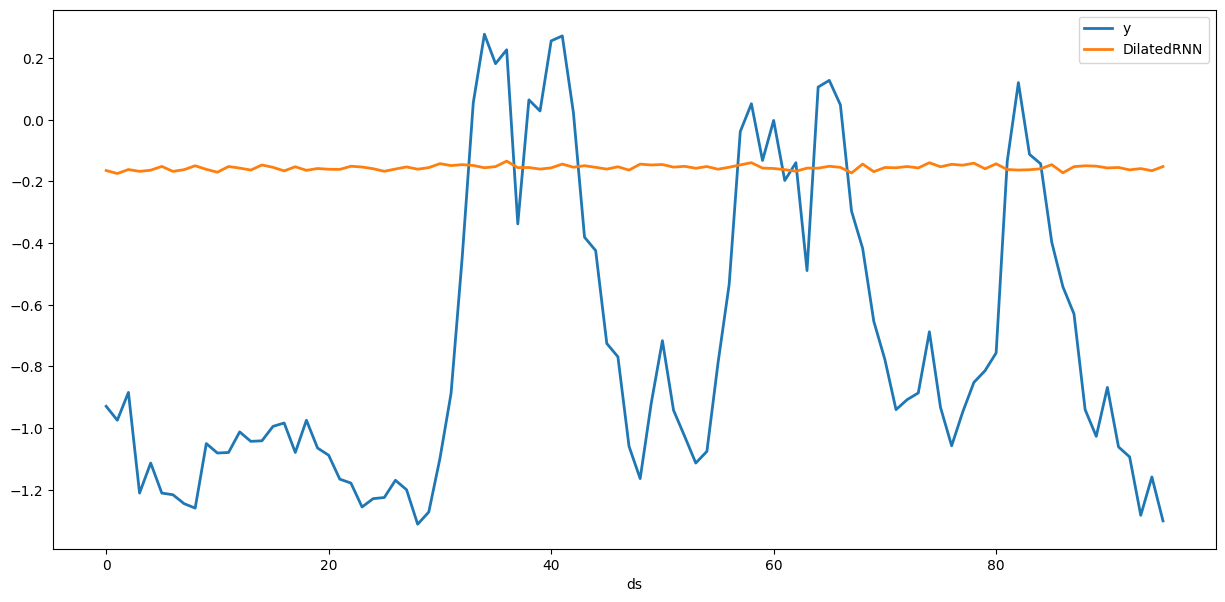

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-0.164592
1,-0.174267
2,-0.161306
3,-0.167306
4,-0.163474
...,...
91,-0.154690
92,-0.162441
93,-0.158271


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.652
DilatedRNN MSE: 0.541
